**Autora:** Mohara Nascimento Almada

**Turma:** 1008

**Programa:** Santander Coders 2023

A média dos resultados dos jogos é de: 6.899
O lançamento máximo foi de: 12
O lançamento mínimo foi de: 2


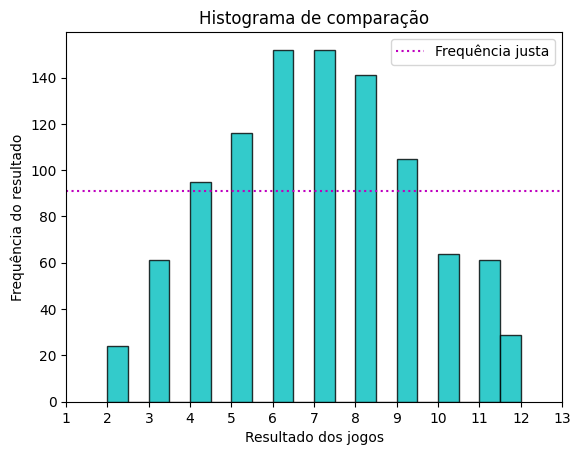

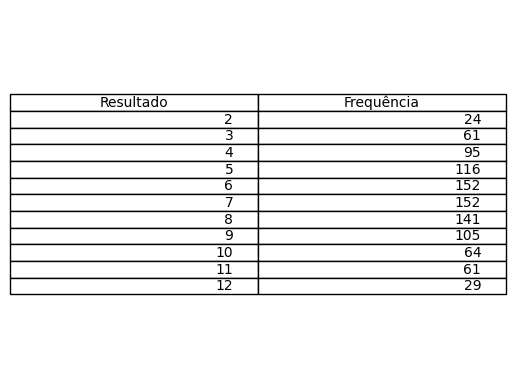

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def lancar_dados():
    '''
    Função que gera dois dados com valores aleatórios de 1 a 7 (excludente) e retorna a soma dos dados
    '''
    dado1 = np.random.randint(1,7)
    dado2 = np.random.randint(1,7)
    soma = dado1 + dado2
    return soma

def armazenar_jogos(numero_de_jogos:int):
    '''
    Função que recebe o número de jogos que o usuário deseja realizar e retorna um array com o resultado de todos os jogos
    '''
    num = 1
    array_final = np.arange(0)

    while num<=numero_de_jogos:
        array_final = np.append(array_final,[lancar_dados()], axis=0)
        num += 1
    
    return array_final

jogos = armazenar_jogos(1000)


print(f"A média dos resultados dos jogos é de: {jogos.mean()}")
print(f"O lançamento máximo foi de: {jogos.max()}")
print(f"O lançamento mínimo foi de: {jogos.min()}")

# Teste de hipóteses: Verificar se o jogo é justo, ou seja, se todos os lançamentos tem a mesma probablidade de ocorrer

# Para isso será feito um histograma que mostra de forma direta e visual os resultados e a frequência em que eles se repetem
plt.hist(jogos, bins=20, alpha=0.8, color='c', edgecolor='black')
plt.xlabel("Resultado dos jogos") 
plt.xticks(np.arange(1, 14, 1))
plt.axhline(y = ((1/11)*len(jogos)), color = 'm', linestyle = ':', label = 'Frequência justa')  # mostra a quantidade justa de repetições (1/11)*número de lançamentos
plt.ylabel("Frequência do resultado") 
plt.title("Histograma de comparação")
plt.legend()
plt.show()

# De maneira adicional será gerada uma tabela com os resultados e suas respectivas frequências
valores_unicos, repeticao_do_valor = np.unique(jogos, return_counts=True)
numeros_repetidos = np.column_stack((valores_unicos, repeticao_do_valor))
fig, ax =plt.subplots(1,1)
data=[[i[0],i[1]] for i in numeros_repetidos]
column_labels=["Resultado", "Frequência"]
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")
plt.show()

### Resposta

- A partir do histograma e da tabela é possível perceber que a simulação **não gera um resultado justo**, uma vez que, cada possível resultado (2,3,4,5,6,7,8,9,10,11,12) tem uma frequência diferente dos demais. Em um jogo justo, todos os resultados deveriam ter a mesma frequência, de (1/11)*número de jogos=(1/11)*1000=90.91. Em contrapartida, na simulação, os valores centrais geralmente tem frequências maiores que 100 e os demais tem frequências que oscilam entre 25 e 90.
- Isso ocorre porque o NumPy interpreta de forma matemática esses jogos e gera resultados semelhantes aos encontrados por probabilidade, onde os casos favoráveis são considerados. Pensando em um evento com 2 dados, existem mais combinações que geram o resultado 7 do que o resultado 2. Pois o resultado 7 pode ser gerado a partir de 6 combinações (1,6),(6,1),(2,5),(5,2),(3,4),(4,3) enquanto o 2 só ocorre quando a combinação é de (1,1), é por isso que no gráfico os valores centrais tendem a ter mais ocorrências que os demais e o 7 segue sendo o com mais frequência pois é o que tem mais probabilidade de ocorrer.

- Para o jogador de dados isso significa que o resultado gerado pelo NumPy não lhe dará um resultado justo e que, se ele quiser ter mais chances de ganhar um jogo feito a partir dessa simulação, ele deve apostar nos números 6, 7 ou 8, pois são os que sempre apresentam maiores probabilidades de ocorrer. Ele também poderia chegar à conclusão de que os dados estão "viciados" tendendo a obter os números centrais em uma maior quantidade de vezes.

### Adicional

- A tabela abaixo mostra os resultados com suas possíveis combinações e probabilidades, a partir dele pode-se calcular os valores aproximados de repetições para determinada simulação gerado pelo NumPy. Para o 7, por exemplo, espera-se que a simulação gere algo em torno de 167 que corresponde a 16,67% de 1000. Para os extremos seria algo em torno de 28 que corresponde a 16,67% de 1000. A mesma lógica pode ser aplicada para os outros resultados.

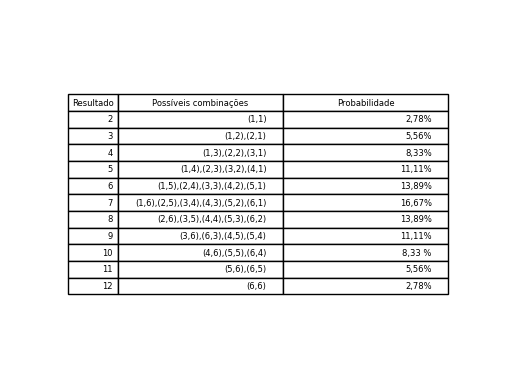

In [9]:
fig, ax =plt.subplots(1,1)
data=[["2","(1,1)","2,78%"],["3","(1,2),(2,1)","5,56%"],["4","(1,3),(2,2),(3,1)","8,33%"],["5","(1,4),(2,3),(3,2),(4,1)","11,11%"],["6","(1,5),(2,4),(3,3),(4,2),(5,1)","13,89%"],["7","(1,6),(2,5),(3,4),(4,3),(5,2),(6,1)","16,67%"],["8","(2,6),(3,5),(4,4),(5,3),(6,2)","13,89%"],["9","(3,6),(6,3),(4,5),(5,4)","11,11%"],["10","(4,6),(5,5),(6,4)","8,33 %"],["11","(5,6),(6,5)","5,56%"],["12","(6,6)","2,78%"]]
column_labels=["Resultado", "Possíveis combinações", "Probabilidade"]
ax.axis('off')
table = ax.table(cellText=data,colLabels=column_labels,loc="center")
table.auto_set_column_width(False)
plt.show()